# Data Collection

In [1]:
#load python packages
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load data 
df = pd.read_csv('Absenteeism_at_work.csv', sep=';')
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


# Data Wrangling

In [3]:
df.rename(columns={'Reason for absence':'Absence_reason', 'Month of absence':'Absence_month', 
                   'Day of the week':'Absence_day', 'Transportation expense':'Transportation_expense', 
                   'Distance from Residence to Work':'Distance_residence_work', 'Service time':'Service_time',
                   'Work load Average/day': 'Average_work_load_per_day', 'Hit target':'Hit_target', 
                   'Disciplinary failure':'Disciplinary_failure', 'Son':'Number_children', 
                   'Social drinker':'Social_drinker', 'Social smoker':'Social_smoker', 'Pet':'Number_pet',
                   'Body mass index':'Body_mass_index', 'Absenteeism time in hours':'Hours_Absent'}, inplace=True)
df.head()

,ID,Absence_reason,Absence_month,Absence_day,Seasons,Transportation_expense,Distance_residence_work,Service_time,Age,Work load Average/day,...,Disciplinary_failure,Education,Number_children,Social_drinker,Social_smoker,Number_pet,Weight,Height,Body_mass_index,Hours_Absent
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       740 non-null    int64  
 1   Absence_reason           740 non-null    int64  
 2   Absence_month            740 non-null    int64  
 3   Absence_day              740 non-null    int64  
 4   Seasons                  740 non-null    int64  
 5   Transportation_expense   740 non-null    int64  
 6   Distance_residence_work  740 non-null    int64  
 7   Service_time             740 non-null    int64  
 8   Age                      740 non-null    int64  
 9   Work load Average/day    740 non-null    float64
 10  Hit_target               740 non-null    int64  
 11  Disciplinary_failure     740 non-null    int64  
 12  Education                740 non-null    int64  
 13  Number_children          740 non-null    int64  
 14  Social_drinker           7

In [5]:
df.nunique()

ID                         36
Absence_reason             28
Absence_month              13
Absence_day                 5
Seasons                     4
Transportation_expense     24
Distance_residence_work    25
Service_time               18
Age                        22
Work load Average/day      38
Hit_target                 13
Disciplinary_failure        2
Education                   4
Number_children             5
Social_drinker              2
Social_smoker               2
Number_pet                  6
Weight                     26
Height                     14
Body_mass_index            17
Hours_Absent               19
dtype: int64

In [6]:
#Create reason for Absence description column
Absence_reason_description = {1:'Certain infectious and parasitic diseases', 
                              2:'Neoplasms',
                              3:'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
                              4:'Endocrine, nutritional and metabolic diseases',
                              5:'Mental and behavioral disorders',
                              6:'Diseases of the nervous system',
                              7:'Diseases of the eye and adnexa',
                              8:'Diseases of the ear and mastoid process',
                              9:'Diseases of the circulatory system',
                              10:'Diseases of the respiratory system',
                              11:'Diseases of the digestive system',
                              12:'Diseases of the skin and subcutaneous tissue',
                              13:'Diseases of the musculoskeletal system and connective tissue',
                              14:'Diseases of the genitourinary system',
                              15:'Pregnancy, childbirth and the puerperium',
                              16:'Certain conditions originating in the perinatal period',
                              17:'Congenital malformations, deformations and chromosomal abnormalities',
                              18:'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified',
                              19:'Injury, poisoning and certain other consequences of external causes',
                              20:'External causes of morbidity and mortality',
                              21:'Factors influencing health status and contact with health services',
                              22:'patient follow-up',
                              23:'medical consultation',
                              24:'blood donation',
                              25:'laboratory examination',
                              26:'unjustified absence',
                              27:'physiotherapy',
                              28:'dental consultation'}

In [7]:
df['Absence_reason_description']=df['Absence_reason'].map(Absence_reason_description)

In [8]:
#Create description columns for months, days and education
Month = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June',
      7:'July', 8:'August', 9:'September', 10:'October', 11:'November',
      12:'December'}
Day = {2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday'}
Education = {1:'high school', 2:'graduate', 3:'postgraduate', 4:'master and doctor'}
Season = {1:'Winter', 2:'Summer', 3:'Fall', 4:'Spring'}

In [9]:
df['Absence_month_description']=df['Absence_month'].map(Month)
df['Absence_day_description']=df['Absence_day'].map(Day)
df['Education_description']=df['Education'].map(Education)
df['Seasons_description']=df['Seasons'].map(Season)

df.head()

,ID,Absence_reason,Absence_month,Absence_day,Seasons,Transportation_expense,Distance_residence_work,Service_time,Age,Work load Average/day,...,Number_pet,Weight,Height,Body_mass_index,Hours_Absent,Absence_reason_description,Absence_month_description,Absence_day_description,Education_description,Seasons_description
0,11,26,7,3,1,289,36,13,33,239.554,...,1,90,172,30,4,unjustified absence,July,Tuesday,high school,Winter
1,36,0,7,3,1,118,13,18,50,239.554,...,0,98,178,31,0,NaN,July,Tuesday,high school,Winter
2,3,23,7,4,1,179,51,18,38,239.554,...,0,89,170,31,2,medical consultation,July,Wednesday,high school,Winter
3,7,7,7,5,1,279,5,14,39,239.554,...,0,68,168,24,4,Diseases of the eye and adnexa,July,Thursday,high school,Winter
4,11,23,7,5,1,289,36,13,33,239.554,...,1,90,172,30,2,medical consultation,July,Thursday,high school,Winter


# Exploratory Data Analysis 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          740 non-null    int64  
 1   Absence_reason              740 non-null    int64  
 2   Absence_month               740 non-null    int64  
 3   Absence_day                 740 non-null    int64  
 4   Seasons                     740 non-null    int64  
 5   Transportation_expense      740 non-null    int64  
 6   Distance_residence_work     740 non-null    int64  
 7   Service_time                740 non-null    int64  
 8   Age                         740 non-null    int64  
 9   Work load Average/day       740 non-null    float64
 10  Hit_target                  740 non-null    int64  
 11  Disciplinary_failure        740 non-null    int64  
 12  Education                   740 non-null    int64  
 13  Number_children             740 non

In [11]:
df.describe().round(decimals=2).T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.02,11.02,1.00,9.00,18.00,28.00,36.00
Absence_reason,740.0,19.22,8.43,0.00,13.00,23.00,26.00,28.00
Absence_month,740.0,6.32,3.44,0.00,3.00,6.00,9.00,12.00
Absence_day,740.0,3.91,1.42,2.00,3.00,4.00,5.00,6.00
Seasons,740.0,2.54,1.11,1.00,2.00,3.00,4.00,4.00
Transportation_expense,740.0,221.33,66.95,118.00,179.00,225.00,260.00,388.00
Distance_residence_work,740.0,29.63,14.84,5.00,16.00,26.00,50.00,52.00
Service_time,740.0,12.55,4.38,1.00,9.00,13.00,16.00,29.00
Age,740.0,36.45,6.48,27.00,31.00,37.00,40.00,58.00
Work load Average/day,740.0,271.49,39.06,205.92,244.39,264.25,294.22,378.88


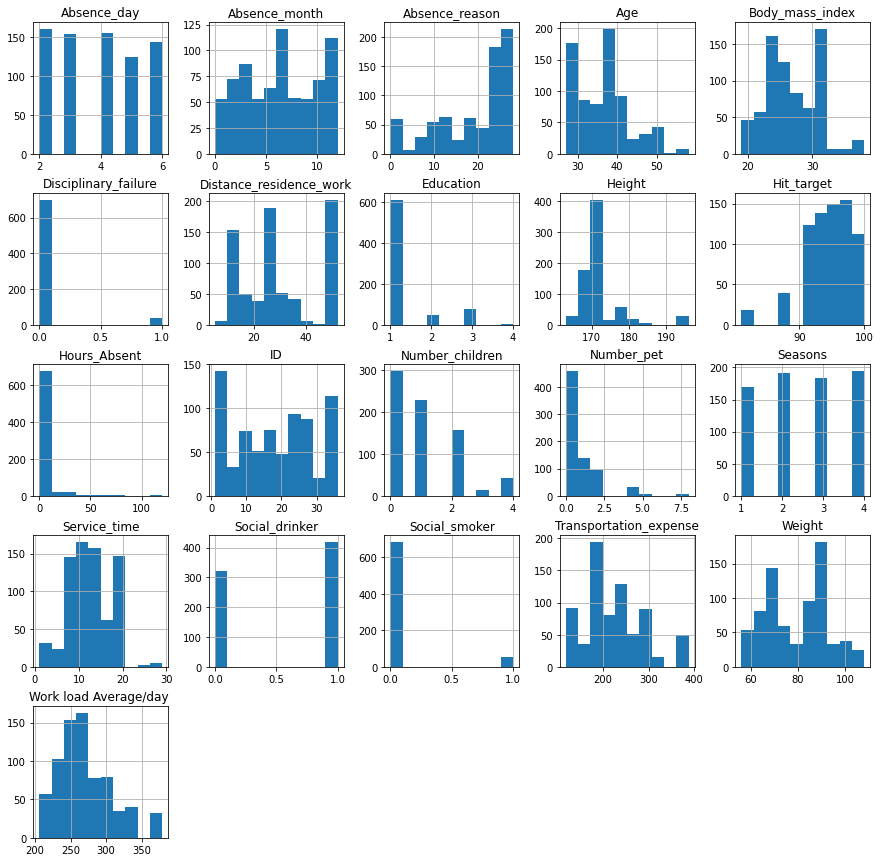

In [12]:
df.hist(figsize=(15,15))
plt.show()

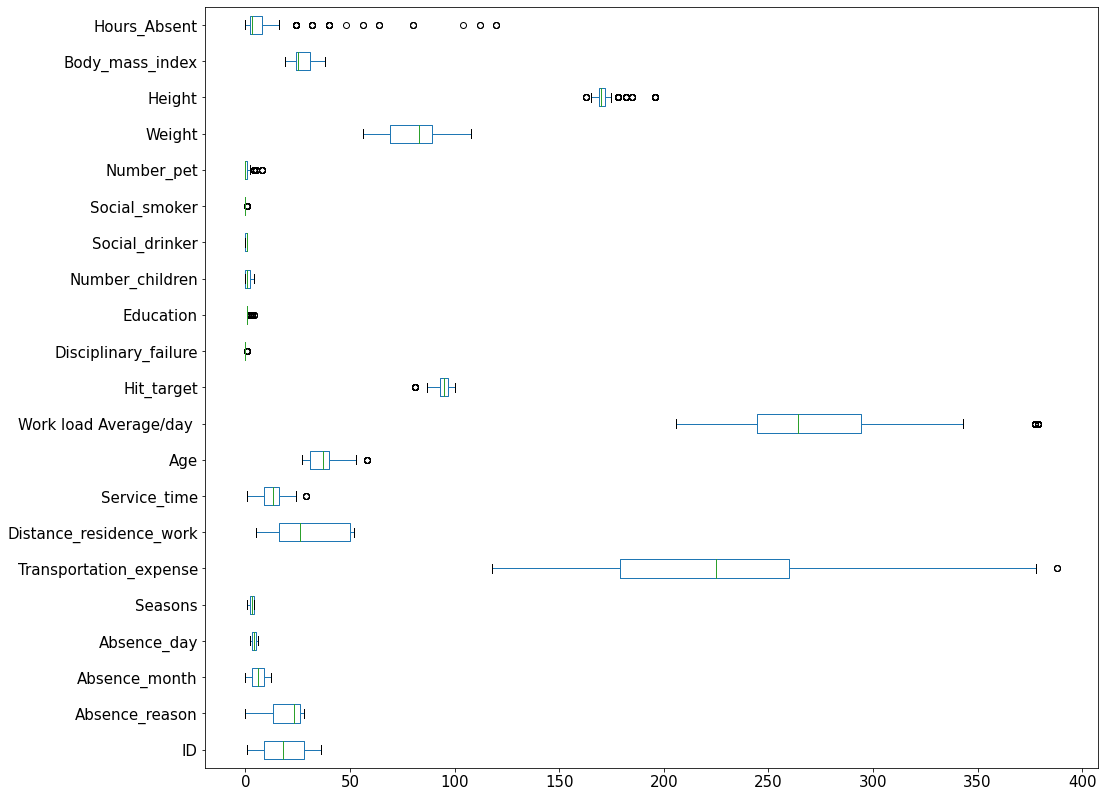

In [13]:
df.boxplot(grid=False, vert=False, figsize=(16, 14), fontsize=15)

In [14]:
df.corr().round(decimals=2)

,ID,Absence_reason,Absence_month,Absence_day,Seasons,Transportation_expense,Distance_residence_work,Service_time,Age,Work load Average/day,...,Disciplinary_failure,Education,Number_children,Social_drinker,Social_smoker,Number_pet,Weight,Height,Body_mass_index,Hours_Absent
ID,1.00,-0.06,-0.00,0.03,0.10,-0.22,-0.49,-0.27,0.04,0.09,...,0.00,-0.04,0.00,-0.45,-0.01,-0.04,-0.25,0.08,-0.31,-0.02
Absence_reason,-0.06,1.00,-0.08,0.12,-0.12,-0.12,0.16,0.05,-0.08,-0.12,...,-0.55,-0.05,-0.06,0.07,-0.12,-0.06,-0.00,-0.08,0.04,-0.17
Absence_month,-0.00,-0.08,1.00,-0.01,0.41,0.14,-0.00,-0.06,-0.00,-0.17,...,0.11,-0.07,0.08,0.06,-0.04,0.05,0.02,-0.07,0.05,0.02
Absence_day,0.03,0.12,-0.01,1.00,0.05,0.03,0.12,0.02,0.00,0.02,...,-0.02,0.06,0.10,0.04,0.01,-0.03,-0.13,-0.08,-0.10,-0.12
Seasons,0.10,-0.12,0.41,0.05,1.00,0.04,-0.06,-0.01,-0.01,0.15,...,0.15,-0.00,0.05,-0.05,-0.05,0.01,-0.03,-0.03,-0.01,-0.01
Transportation_expense,-0.22,-0.12,0.14,0.03,0.04,1.00,0.26,-0.35,-0.23,0.01,...,0.11,-0.06,0.38,0.15,0.04,0.40,-0.21,-0.19,-0.14,0.03
Distance_residence_work,-0.49,0.16,-0.00,0.12,-0.06,0.26,1.00,0.13,-0.15,-0.07,...,-0.06,-0.26,0.05,0.45,-0.08,0.21,-0.05,-0.35,0.11,-0.09
Service_time,-0.27,0.05,-0.06,0.02,-0.01,-0.35,0.13,1.00,0.67,-0.00,...,-0.00,-0.21,-0.05,0.35,0.07,-0.44,0.46,-0.05,0.50,0.02
Age,0.04,-0.08,-0.00,0.00,-0.01,-0.23,-0.15,0.67,1.00,-0.04,...,0.10,-0.22,0.06,0.21,0.12,-0.23,0.42,-0.06,0.47,0.07
Work load Average/day,0.09,-0.12,-0.17,0.02,0.15,0.01,-0.07,-0.00,-0.04,1.00,...,0.03,-0.07,0.03,-0.03,0.03,0.01,-0.04,0.10,-0.09,0.02


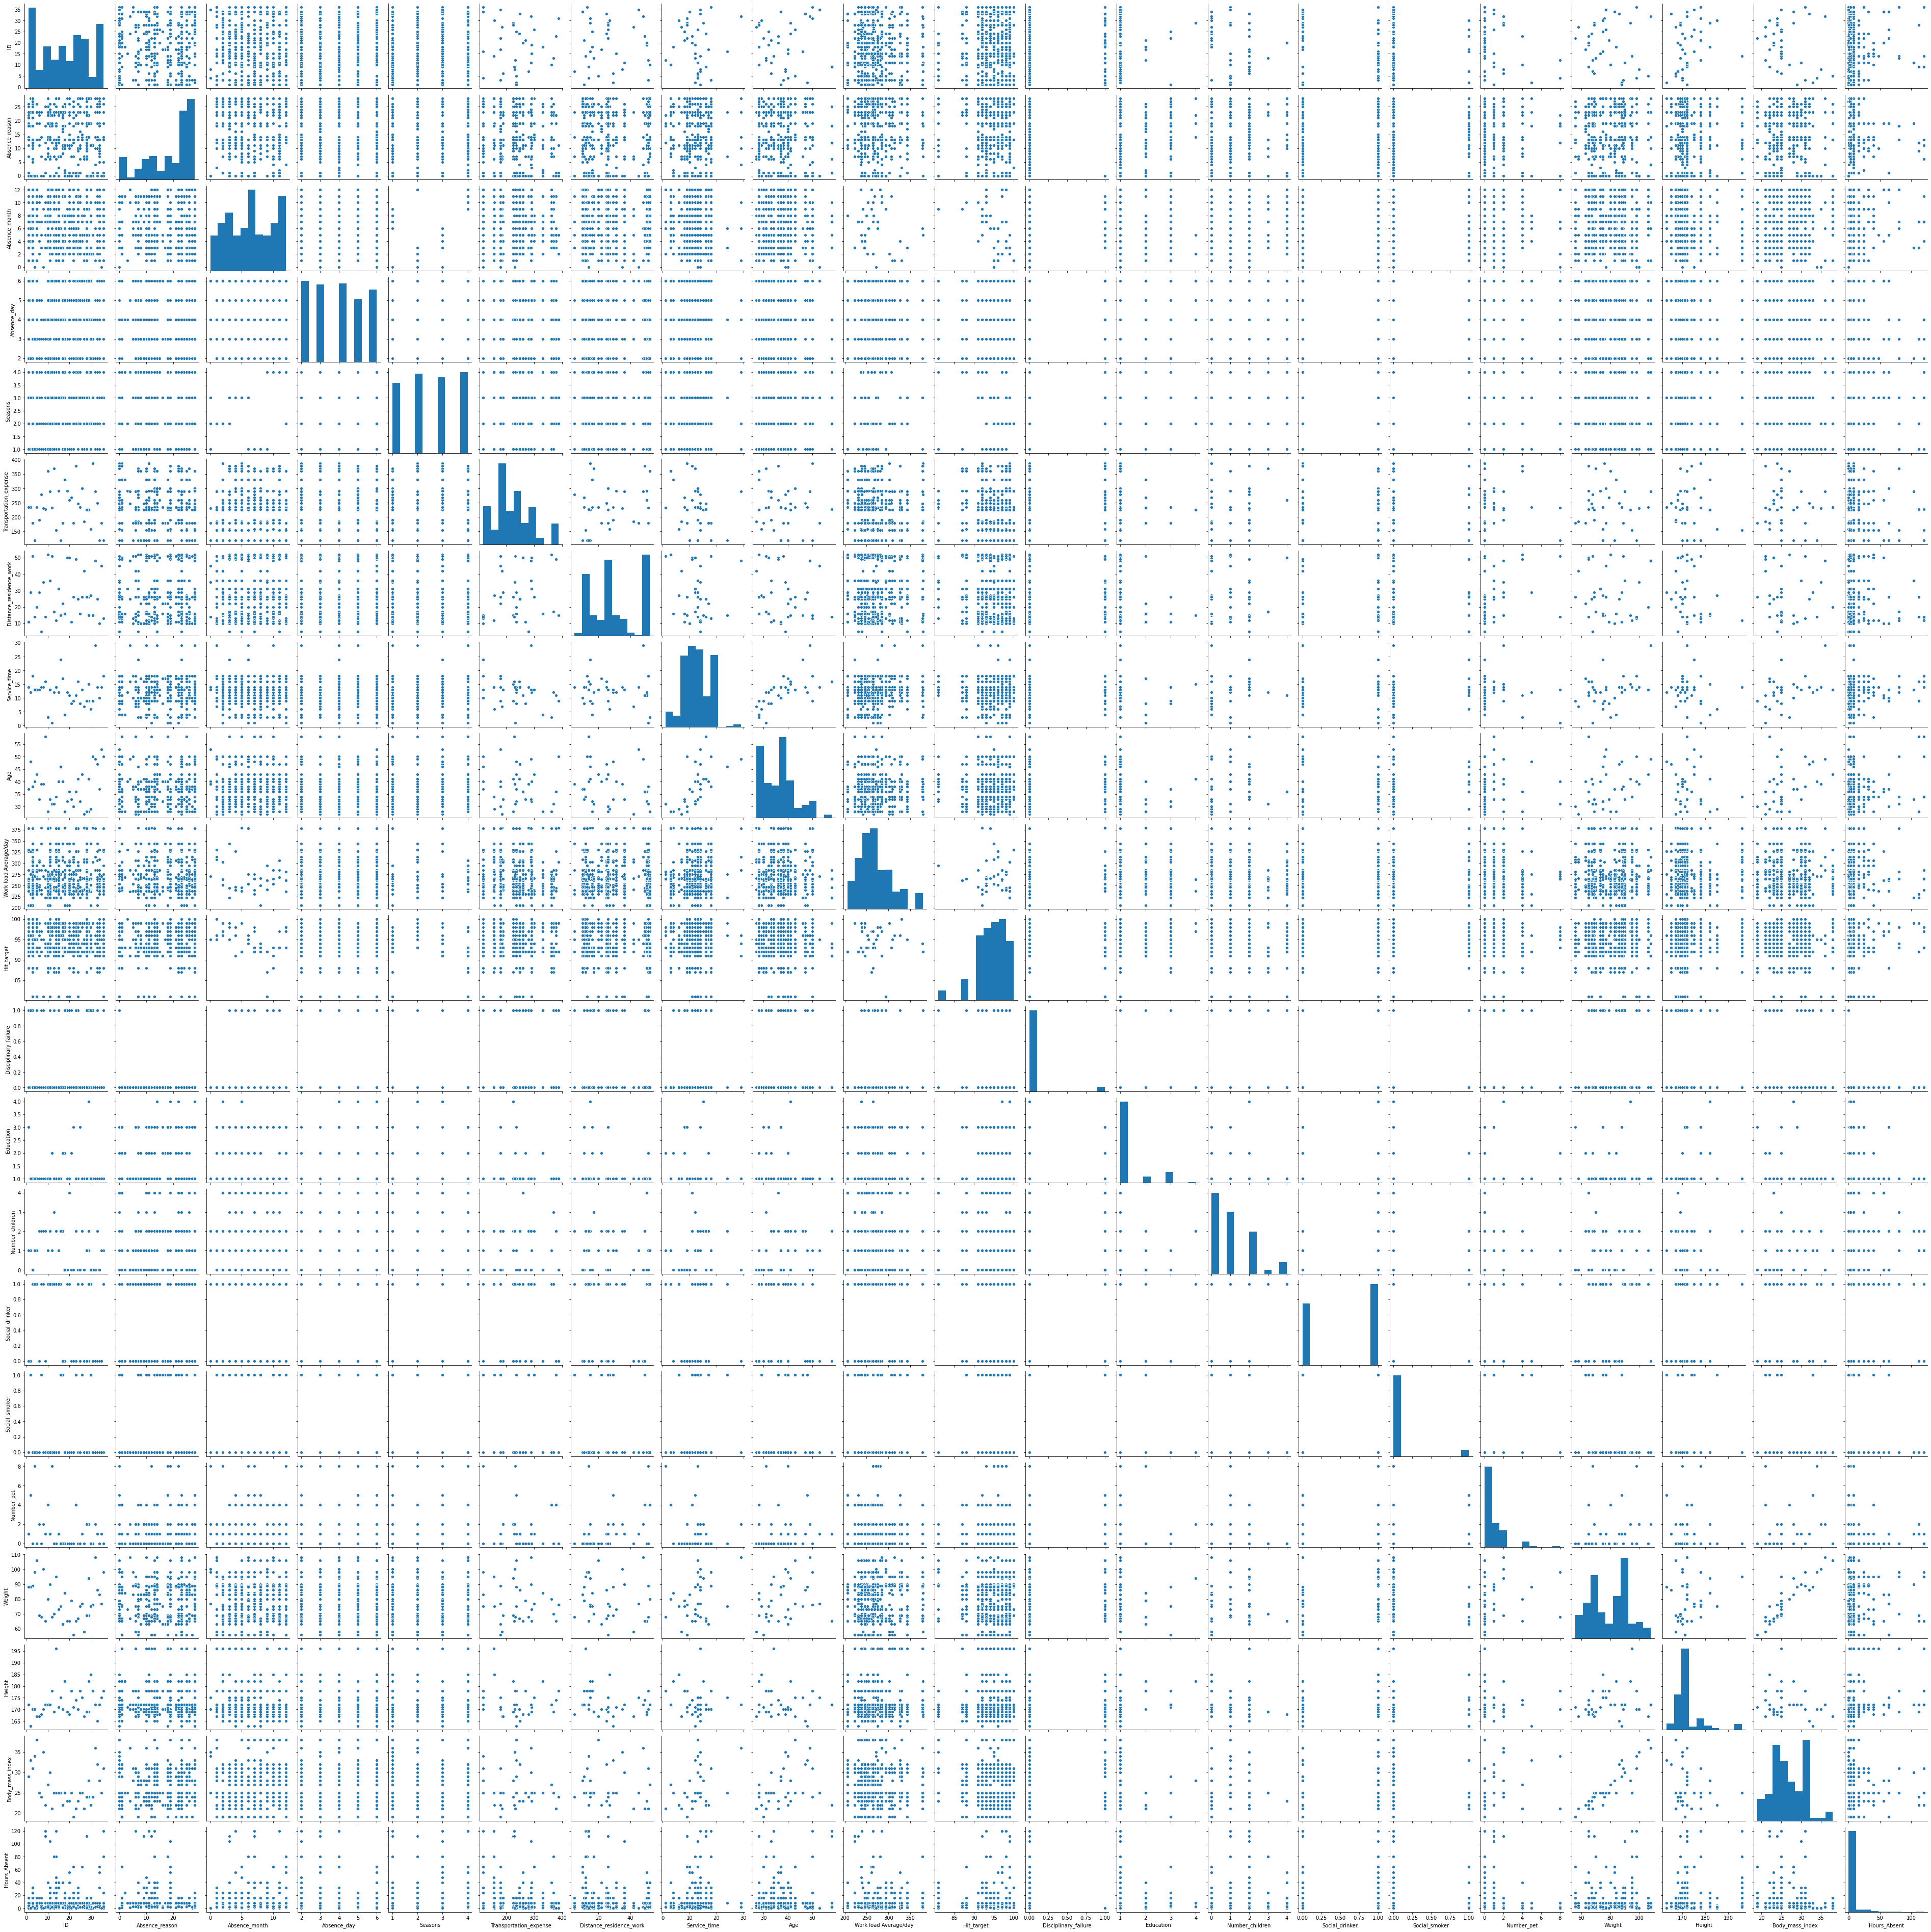

In [15]:
sns.pairplot(df)

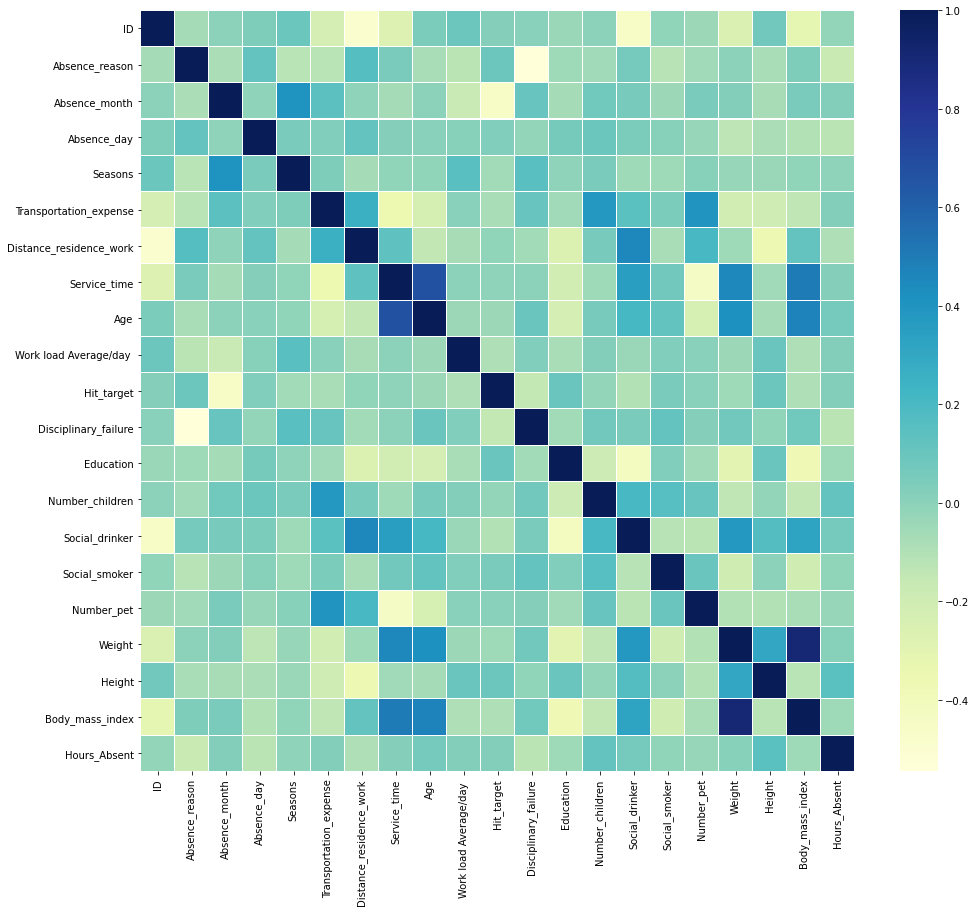

In [16]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu")

In [21]:
df.groupby(by='ID').sum()

,Absence_reason,Absence_month,Absence_day,Seasons,Transportation_expense,Distance_residence_work,Service_time,Age,Work load Average/day,Hit_target,Disciplinary_failure,Education,Number_children,Social_drinker,Social_smoker,Number_pet,Weight,Height,Body_mass_index,Hours_Absent
ID,,,,,,,,,,,,,,,,,,,,
1,412,166,86,57,5405,253,322,851,6046.573,2189,1,69,23,0,0,23,2024,3956,667,121
2,87,41,19,10,1410,174,72,288,1449.582,560,2,6,6,0,6,30,528,978,198,25
3,2595,630,443,268,20227,5763,2034,4294,29625.782,10743,1,113,0,113,0,0,10057,19210,3503,482
4,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0
5,325,161,67,54,4465,380,247,817,5066.362,1739,5,19,19,19,0,0,2014,3173,722,104
6,155,45,29,19,1512,232,104,264,2198.632,759,0,8,16,0,0,16,552,1336,200,72
7,58,36,24,14,1674,30,84,234,1819.265,568,2,6,12,6,6,0,408,1008,144,30
8,0,9,7,3,462,70,28,78,565.436,176,1,2,4,2,0,4,200,340,70,0
9,111,46,26,16,1824,112,128,464,1992.338,767,0,8,16,0,0,8,520,1376,176,262
